In [1]:
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt
import pandas as pd
f = sp.loadmat('P3.mat')
x = np.array(f['x'])
t = np.array(f['t'])
M = 100
x = x.flatten()
t = t.flatten()
ds = pd.DataFrame({
    'x' : x,
    't' : t,
})
ds = ds.sort_values(by = ['x'])
x = ds['x']
t = ds['t']

Text(0, 0.5, 't')

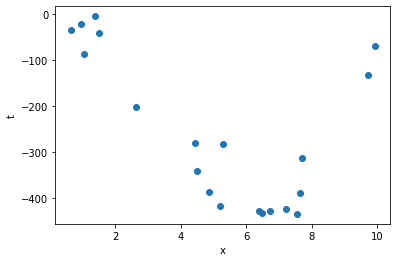

In [110]:
plt.close('all')
plt.figure(1)
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('t')

In [2]:
pn = [[] for _ in range(M)]
for i in range(M):
    pn[i] = np.polyfit(x,t,i)

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly co

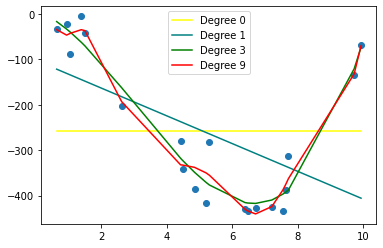

In [193]:
y = [np.polyval(pn[i],x) for i in range(M)]
plt.figure(1)
plt.scatter(x,t)
plt.plot(x,y[0],'yellow')
plt.plot(x,y[1],'teal')
plt.plot(x,y[3],'green')
plt.plot(x,y[9],'red')
plt.legend(['Degree 0','Degree 1','Degree 3','Degree 9'],loc = 'upper center')
plt.show()

In [113]:
def sum_of_squares(x,t,pn):   # takes x,t,polynomial
    y = np.polyval(pn,x)
    sum = np.sum((y-t)**2)/2
    return sum

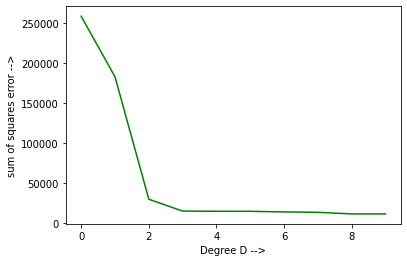

In [119]:
errs = [sum_of_squares(x,t,pn[i]) for i in range(M)]
plt.plot(range(M),errs,'g')
plt.xlabel('Degree D -->')
plt.ylabel('sum of squares error -->')
plt.show()

From the above figure the best choice seems to be $D$ = 3.

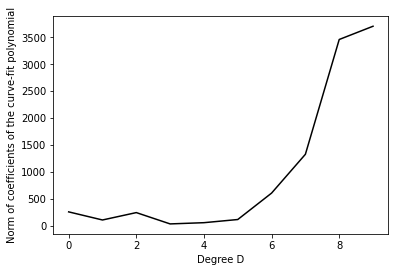

In [118]:
norms = [np.linalg.norm(pn[i]) for i in range(M)]
plt.plot(range(M),norms,'black')
plt.xlabel('Degree D')
plt.ylabel('Norm of coefficients of the curve-fit polynomial')
plt.show()

From above, we can see over-fitting qunatised as the norm of the coefficient vector. It increases with degree $D$.

In [200]:
def regularised_error(x,t,pn,l):   # takes x,t,polynomial
    y = np.polyval(pn,x)
    sum = np.sum((y-t)**2)/2
    sum = sum + l*(np.linalg.norm(pn)**2)/2
    return sum

<ipython-input-201-5a942f2476cb>:2: RuntimeWarning: overflow encountered in exp
  rerrs = [[regularised_error(x,t,pn[i],d) for i in range(M)] for d in [np.exp(100000),np.exp(-20),np.exp(-1000000)]]


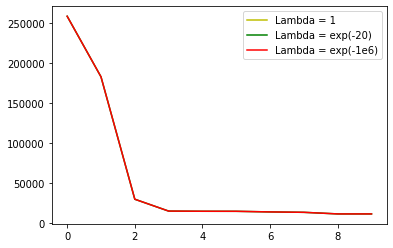

In [201]:
l = np.exp(-18)
rerrs = [[regularised_error(x,t,pn[i],d) for i in range(M)] for d in [np.exp(100000),np.exp(-20),np.exp(-1000000)]]
plt.plot(range(M),rerrs[0],'y')
plt.plot(range(M),rerrs[1],'g')
plt.plot(range(M),rerrs[2],'r')
plt.legend(['Lambda = 1','Lambda = exp(-20)','Lambda = exp(-1e6)'],loc = 'upper right')
plt.show()

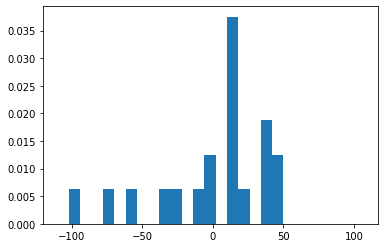

In [224]:
hist = np.histogram(y[3]-t,bins = np.arange(-110,110,20))
plt.hist(y[3]-t,bins = np.arange(-110,110,8), density=True)
plt.show()

The noise distribution is maximum around 0-20 and is highly present in 20-40 as well, but decreases in density from 0 to -100. There is no error after 40 or before -100.

In [219]:
(y[3]-t).std()

40.183160401928724

In [1]:
data = pandas.read

NameError: name 'numpy' is not defined